<a href="https://colab.research.google.com/github/hmit208/stock-analysis-20191/blob/master/ARIMA_to_pedict_stock_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

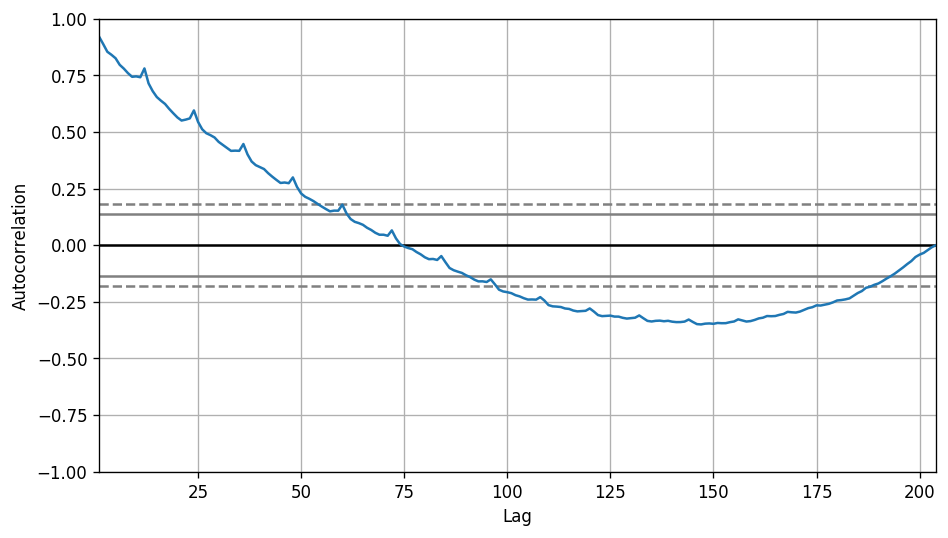

In [0]:
from pandas.plotting import autocorrelation_plot
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('VCB.csv')
df['Date'] = pd.to_datetime(df.Date, format='%d/%m/%Y')
df.index = df['Date']
df = df.sort_index(ascending=True)
# df.reset_index(inplace=True)
df

In [0]:
df.index = df['Date']

In [0]:
df['Date']

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


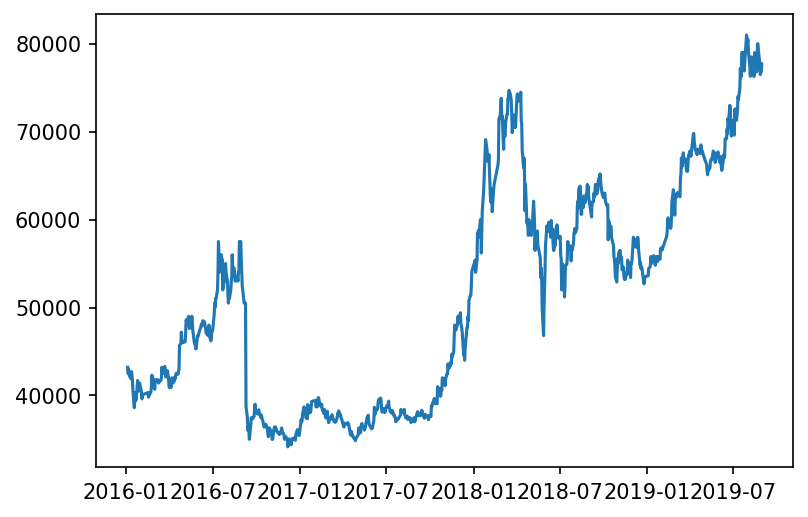

In [0]:
plt.figure(dpi=150)
plt.plot(df['Date'], df['Close'])
plt.show()

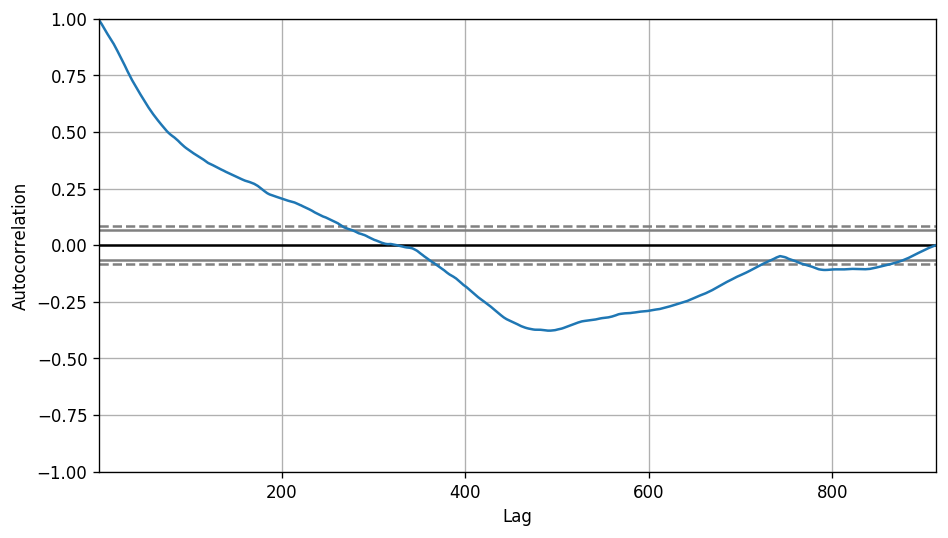

In [0]:
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df['Close'].tolist())

## Scatter plot

In [0]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

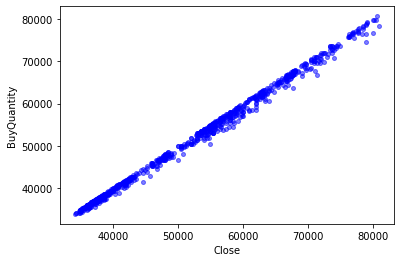

In [0]:

plt.scatter(df['Close'], df['Low'].dropna(), s=16, c='b', alpha=0.5)
plt.xlabel('Close')
plt.ylabel('BuyQuantity')
plt.show()

In [0]:
%load_ext rpy2.ipython

In [0]:
import seaborn as sns

In [0]:
df.drop(columns=["Unnamed: 0"])

,Date,Close,VWAP,Open,Volume,High,Low,BuyQuantity,SellQuantity,ROE,EPS
Date,,,,,,,,,,,
2016-01-04,2016-01-04,43200,43260.00,43800,761750,44000,42600,1301610,1315530,25.48,4658.84
2016-01-05,2016-01-05,42500,42719.23,42900,1133260,43400,42400,1999390,1725060,25.48,4658.84
2016-01-06,2016-01-06,43000,42784.03,42500,699490,43200,42500,1419150,1022920,25.48,4658.84
2016-01-07,2016-01-07,42500,42536.29,42800,935460,42900,42000,1733430,1457390,25.48,4658.84
2016-01-08,2016-01-08,42200,42150.40,42400,676340,42600,41700,1533660,1138010,25.48,4658.84
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-26,2019-08-26,77800,78031.00,78200,672220,78600,77500,1235290,1287730,25.48,4658.84
2019-08-27,2019-08-27,76500,77348.45,78200,1116480,78800,76000,1773870,1729610,25.48,4658.84
2019-08-28,2019-08-28,77000,77055.42,76800,588810,77300,76800,1099180,893690,25.48,4658.84


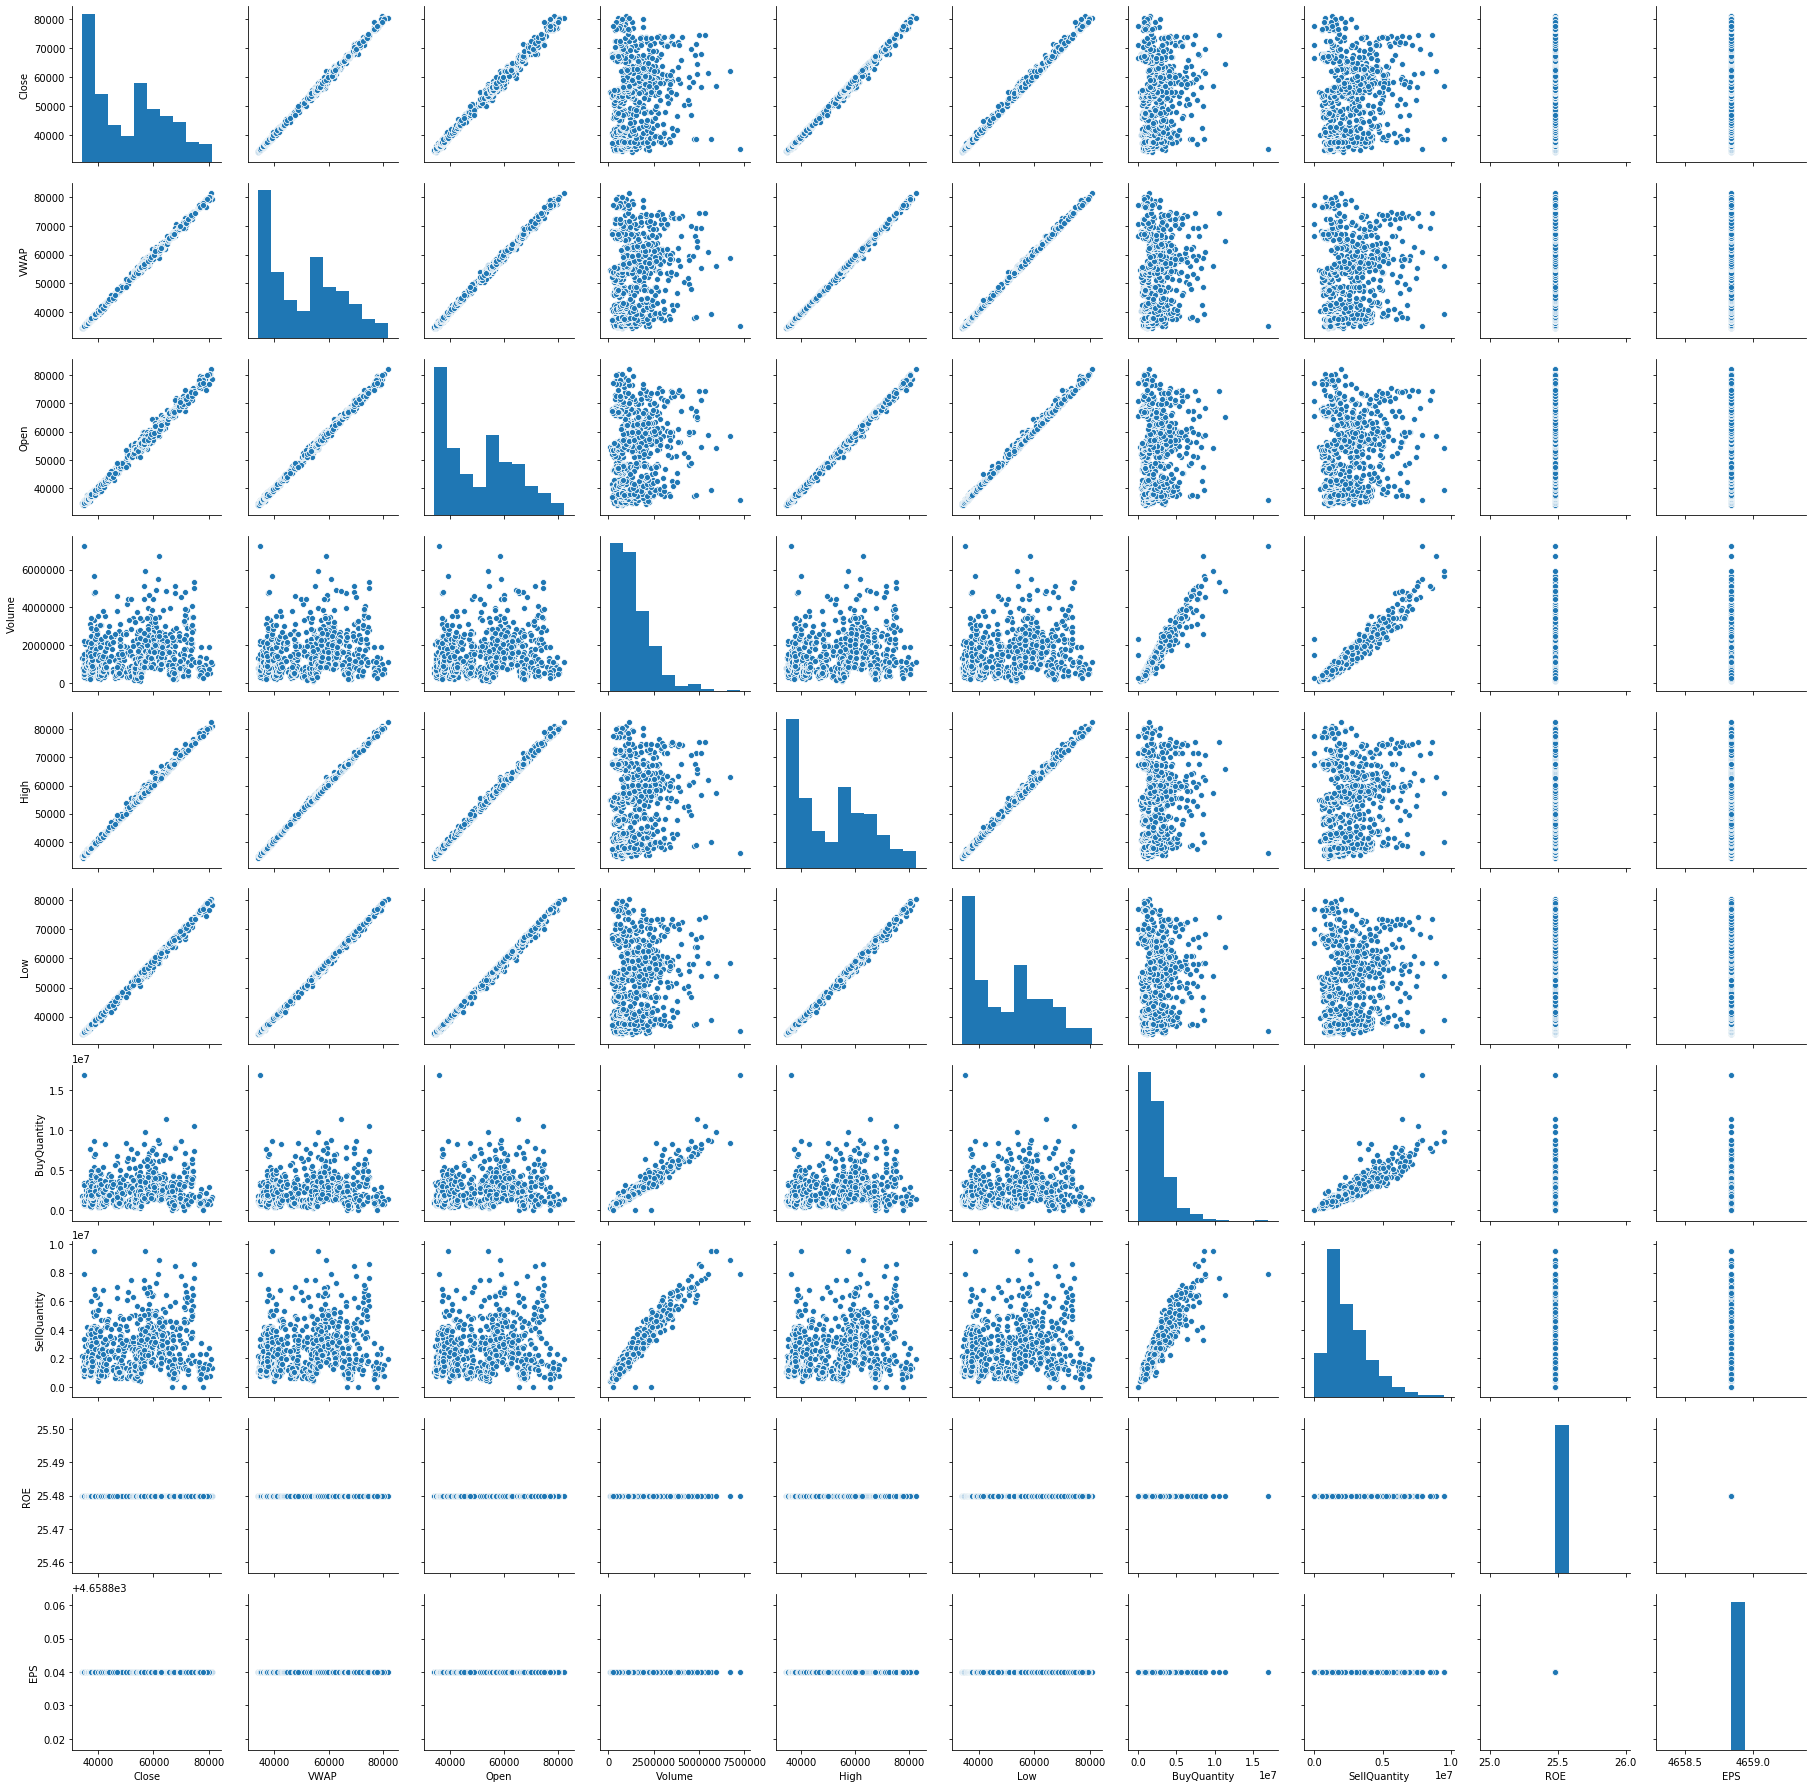

In [0]:
sns_plot = sns.pairplot(df.drop(columns=["Unnamed: 0"]))
sns_plot.savefig("output.png")

In [0]:
sns_plot.savefig("output.png")

NameError: ignored

## ...

In [0]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Import Data
df = pd.read_csv('VRE.csv', parse_dates=['Date'], index_col='Date')
df = df.sort_index(ascending=True)
df.reset_index(inplace=True)

df

,Date,Unnamed: 0,Close,VWAP,Open,Volume,High,Low,BuyQuantity,SellQuantity,ROE,EPS
0,2017-01-12,432,49500,49318.67,49200,1312140,49900,48500,2109340,2411610,9.18,1071.82
1,2017-04-12,431,49500,49372.79,49900,1584010,50000,48850,2962160,2895410,9.18,1071.82
2,2017-05-12,430,48000,49021.98,50000,1980030,50000,47900,2543250,3885950,9.18,1071.82
3,2017-06-11,451,40550,40000.00,40550,800,40550,40550,23910070,800,9.18,1071.82
4,2017-06-12,429,47100,47306.93,48400,1834150,48500,46700,2702150,3585210,9.18,1071.82
...,...,...,...,...,...,...,...,...,...,...,...,...
447,2019-12-03,119,36700,36404.97,35600,3752290,36800,35600,5818630,6518780,9.18,1071.82
448,2019-12-04,96,34950,34884.85,34300,1032540,35050,34300,2571670,2250350,9.18,1071.82
449,2019-12-06,57,34950,35117.55,35150,900490,35300,34950,1380330,1962650,9.18,1071.82
450,2019-12-07,35,35900,36353.15,36550,1898460,36750,35900,2569490,3683570,9.18,1071.82


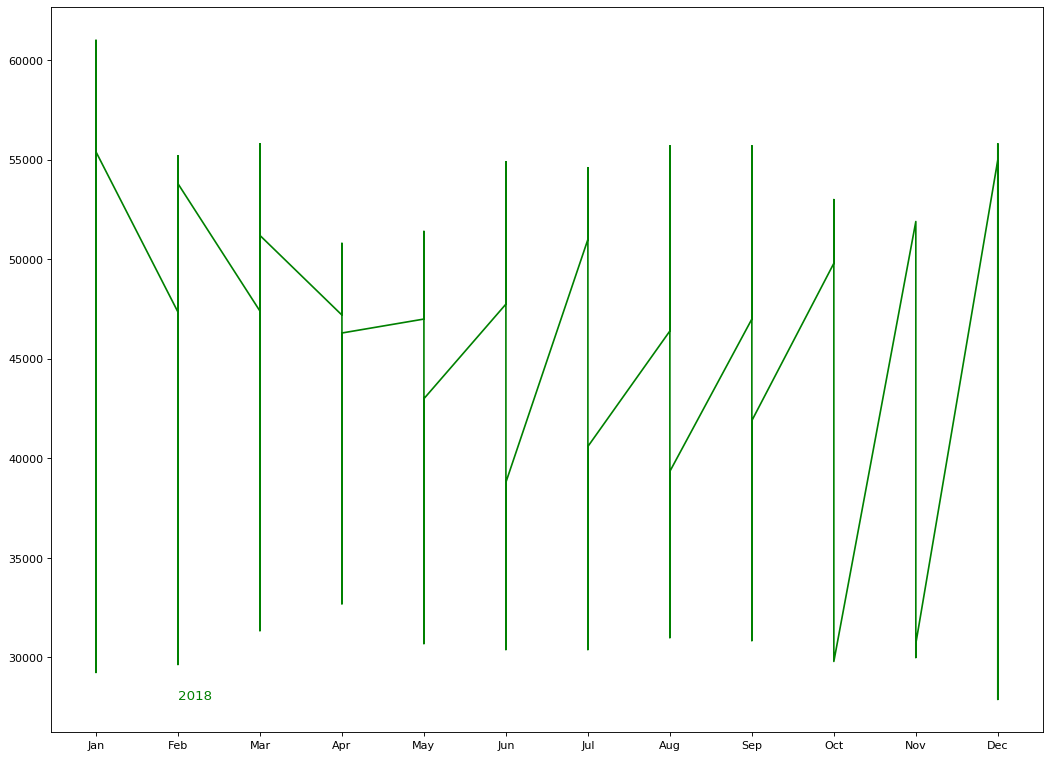

In [0]:
     
# Prepare data
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
# mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)
mycolors = ['red', 'green', 'blue']
# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i == 1:        
        # print(y)
        # print(df.loc[df.year==y, :].shape[0]-.9)
        # print(df.loc[df.year==y, 'Close'][-1:].values)
        plt.plot('month', 'Close', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(1, df.loc[df.year==y, 'Close'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# # Decoration
# plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
# plt.yticks(fontsize=12, alpha=.7)
# plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
# plt.show()

# determine p,d,q

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [0]:
df = pd.read_csv("./VCB.csv")
df.index = df['Date']
df.head()
df['Date'] = pd.to_datetime(df.Date, format='%d/%m/%Y')
df.index = df['Date']
cols = ['Close', 'High', 'Low', 'Volume']
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=cols)

In [0]:
df = data

In [0]:
df = df['Close']

In [0]:
df

Date
2016-01-04    43200
2016-01-05    42500
2016-01-06    43000
2016-01-07    42500
2016-01-08    42200
              ...  
2019-08-26    77800
2019-08-27    76500
2019-08-28    77000
2019-08-29    76800
2019-08-30    77700
Name: Close, Length: 913, dtype: int64

In [0]:
df.reset_index

<bound method Series.reset_index of Date
2019-08-30    77700
2019-08-29    76800
2019-08-28    77000
2019-08-27    76500
2019-08-26    77800
              ...  
2016-01-08    42200
2016-01-07    42500
2016-01-06    43000
2016-01-05    42500
2016-01-04    43200
Name: Close, Length: 913, dtype: int64>

In [0]:
df = pd.read_csv("./VCB.csv")


In [0]:
df.columns

Index(['Unnamed: 0', 'Date', 'Close', 'VWAP', 'Open', 'Volume', 'High', 'Low',
       'BuyQuantity', 'SellQuantity', 'ROE', 'EPS'],
      dtype='object')

In [0]:
df2 =  df.drop(columns=['Unnamed: 0','VWAP', 'Open','Volume', 'High', 'Low',
       'BuyQuantity', 'SellQuantity', 'ROE', 'EPS'])

In [0]:
df2['Date'] = pd.to_datetime(df.Date, format='%d/%m/%Y')

In [0]:
df2.index = df2['Date']

In [0]:
df2

,Date,Close
Date,,
2016-01-04,2016-01-04,43200
2016-01-05,2016-01-05,42500
2016-01-06,2016-01-06,43000
2016-01-07,2016-01-07,42500
2016-01-08,2016-01-08,42200
...,...,...
2019-08-26,2019-08-26,77800
2019-08-27,2019-08-27,76500
2019-08-28,2019-08-28,77000


In [0]:
df2 = df2.sort_index(ascending=True, axis=0)

In [0]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['Close'].dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.000299
p-value: 0.286442


In [0]:
df.columnsdf2['Close']

Index(['Unnamed: 0', 'Date', 'Close', 'VWAP', 'Open', 'Volume', 'High', 'Low',
       'BuyQuantity', 'SellQuantity', 'ROE', 'EPS'],
      dtype='object')

In [0]:
df = []
for i in df2['Close']:
  df.append(i) 

In [0]:
df['Close']

0      77700
1      76800
2      77000
3      76500
4      77800
       ...  
908    42200
909    42500
910    43000
911    42500
912    43200
Name: Close, Length: 913, dtype: int64

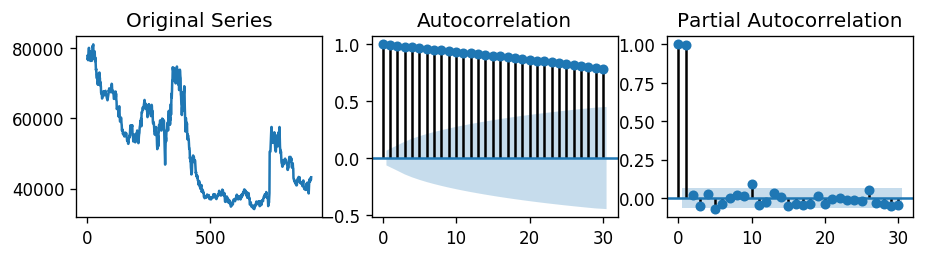

In [0]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,2), 'figure.dpi':120})

# Import data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
# df = df2['Close']
# Original Series
fig, axes = plt.subplots(1, 3, sharex=False)
# axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
# plot_acf(df['Close'].dropna(), ax=axes[0, 1], lags=40)
# plot_pacf(df['Close'], ax=axes[0, 2])
axes[0].plot(df['Close']); axes[0].set_title('Original Series')
plot_acf(df['Close'].dropna(), ax=axes[1])
plot_pacf(df['Close'].dropna(), ax=axes[2])

# # 1st Differencing
# axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
# plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
# axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])
# # 3rd Differencing
# axes[3, 0].plot(df['Close'].diff().diff().diff()); axes[3, 0].set_title('2nd Order Differencing')
# plot_acf(df['Close'].diff().diff().diff().dropna(), ax=axes[3, 1])

plt.show()

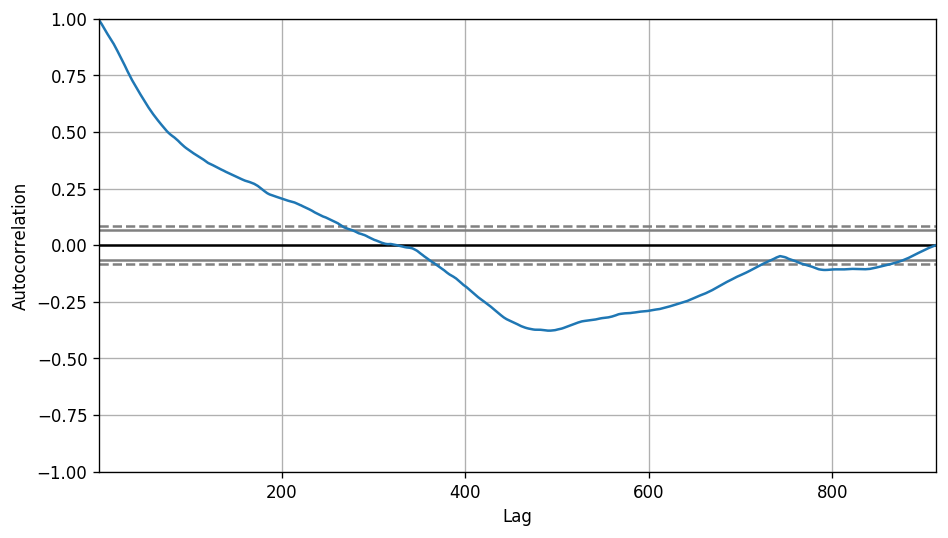

In [0]:
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df['Close'].tolist())

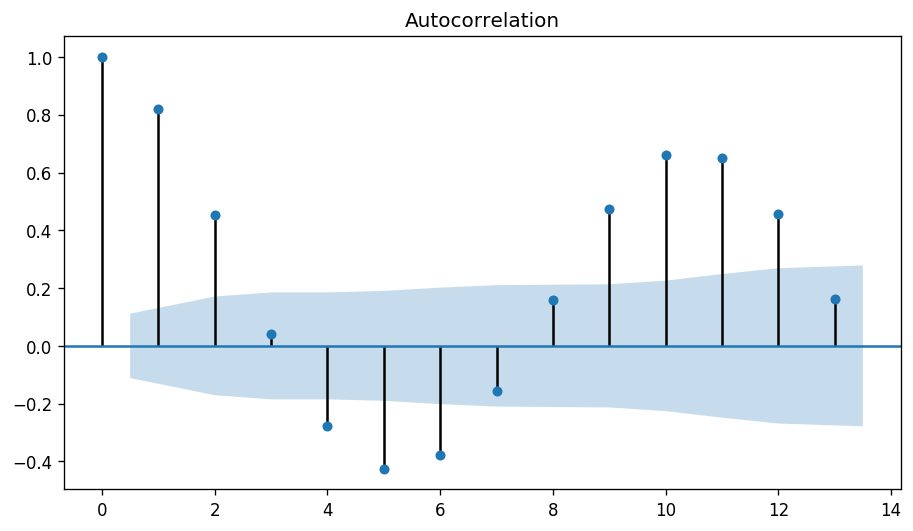

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=13)
plt.show()

# ARIMA model

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [0]:
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./VCB.csv")
df.index = df['Date']
df.head()

,Unnamed: 0,Date,Close,VWAP,Open,Volume,High,Low,BuyQuantity,SellQuantity,ROE,EPS
Date,,,,,,,,,,,,
30/08/2019,0,30/08/2019,77700,77517.58,77000,280130,77700,77000,0,0,25.48,4658.84
29/08/2019,1,29/08/2019,76800,76785.71,76900,422240,77400,76500,965790,563110,25.48,4658.84
28/08/2019,2,28/08/2019,77000,77055.42,76800,588810,77300,76800,1099180,893690,25.48,4658.84
27/08/2019,3,27/08/2019,76500,77348.45,78200,1116480,78800,76000,1773870,1729610,25.48,4658.84
26/08/2019,4,26/08/2019,77800,78031.00,78200,672220,78600,77500,1235290,1287730,25.48,4658.84


In [0]:
df['Date'] = pd.to_datetime(df.Date, format='%d/%m/%Y')
df.index = df['Date']

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


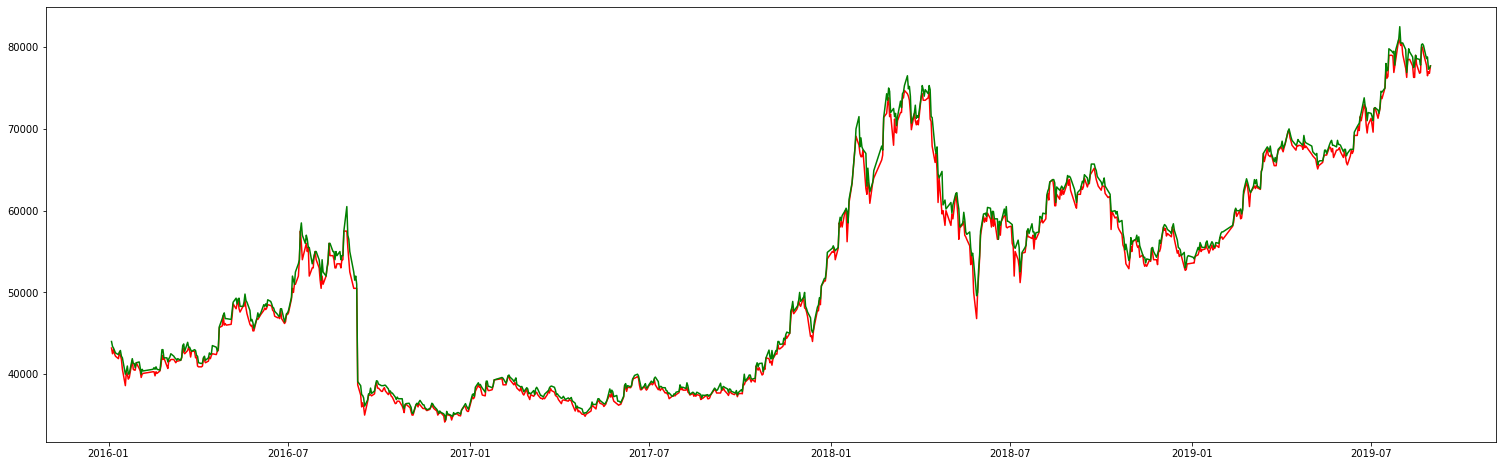

In [4]:
plt.figure(figsize=(26, 8))
plt.plot(df['Close'], label='Close Price history', color='red')
plt.plot(df['High'], label='Close Price history', color='green')

# print(df['Close'])
plt.show()

In [0]:
cols = ['Close', 'High', 'Low', 'Volume']
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=cols)

In [6]:
data

,Unnamed: 0,Date,Close,VWAP,Open,Volume,High,Low,BuyQuantity,SellQuantity,ROE,EPS
Date,,,,,,,,,,,,
2016-01-04,912,2016-01-04,43200,43260.00,43800,761750,44000,42600,1301610,1315530,25.48,4658.84
2016-01-05,911,2016-01-05,42500,42719.23,42900,1133260,43400,42400,1999390,1725060,25.48,4658.84
2016-01-06,910,2016-01-06,43000,42784.03,42500,699490,43200,42500,1419150,1022920,25.48,4658.84
2016-01-07,909,2016-01-07,42500,42536.29,42800,935460,42900,42000,1733430,1457390,25.48,4658.84
2016-01-08,908,2016-01-08,42200,42150.40,42400,676340,42600,41700,1533660,1138010,25.48,4658.84
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-26,4,2019-08-26,77800,78031.00,78200,672220,78600,77500,1235290,1287730,25.48,4658.84
2019-08-27,3,2019-08-27,76500,77348.45,78200,1116480,78800,76000,1773870,1729610,25.48,4658.84
2019-08-28,2,2019-08-28,77000,77055.42,76800,588810,77300,76800,1099180,893690,25.48,4658.84


<Figure size 14400x14400 with 0 Axes>

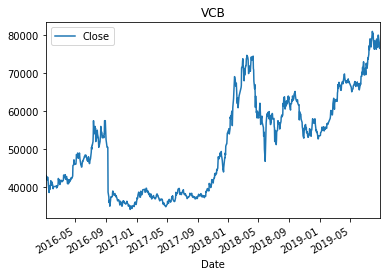

In [7]:
plt.figure(figsize=(200, 200))
data[['Close']].plot()
plt.title("VCB")
plt.show()

In [0]:
cols = ['Close', 'High', 'Low', 'Volume']
new_data = pd.DataFrame(index=range(0, len(df)), columns=cols)
for i in range(0, len(data)):
    for col in cols:
        new_data[col][i] = data[col][i]

In [0]:
new_data

In [0]:
df = data

In [0]:
df

In [0]:
dr = df.cumsum()
dr.plot()
plt.title('FPT Cumulative Returns')

Text(0.5, 1.0, 'Tesla Autocorrelation plot')

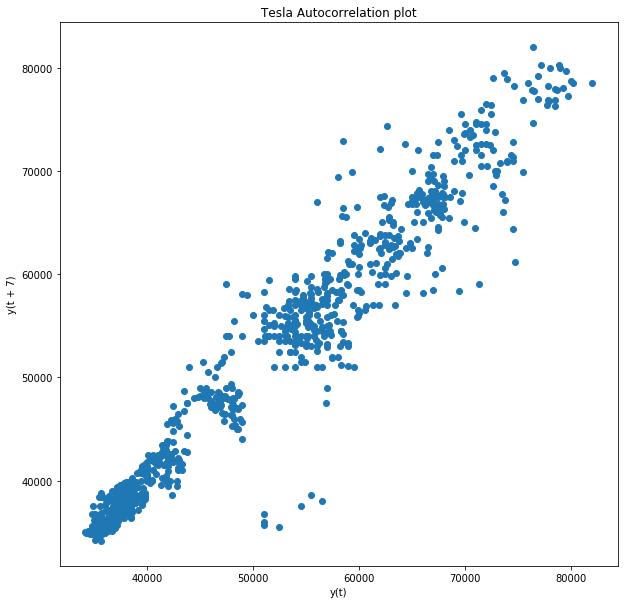

In [20]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=7)
plt.title('Tesla Autocorrelation plot')

Text(0.5, 1.0, 'FPT Autocorrelation plot')

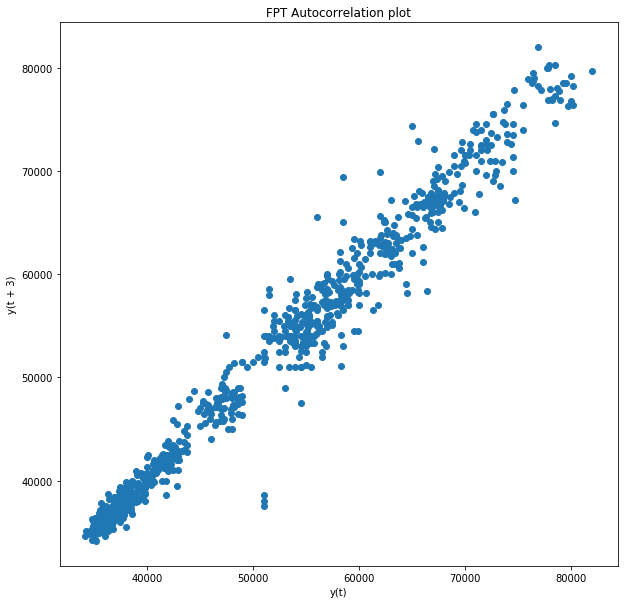

In [0]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=3)
plt.title('FPT Autocorrelation plot')

Text(0.5, 1.0, 'FPT Autocorrelation plot')

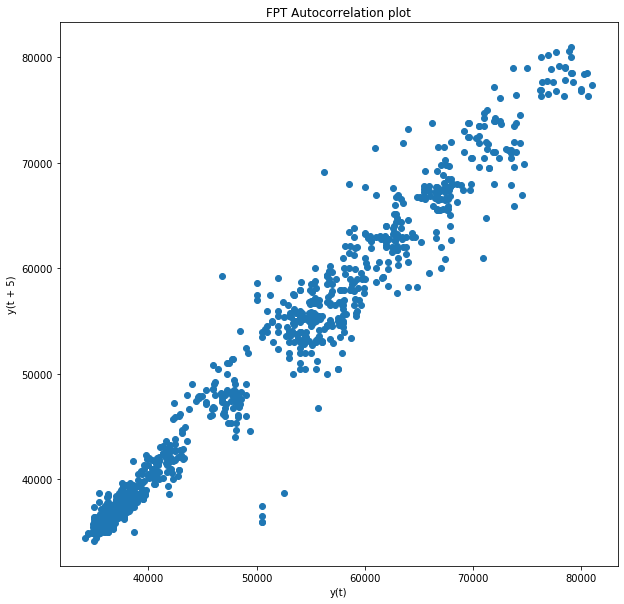

In [15]:
plt.figure(figsize=(10,10))
lag_plot(df['Close'], lag=5)
plt.title('FPT Autocorrelation plot')

In [0]:
plt.figure(figsize=(10,10))
lag_plot(df['Volume'], lag=5)
plt.title('FPT Autocorrelation plot')

In [0]:
df['Date']

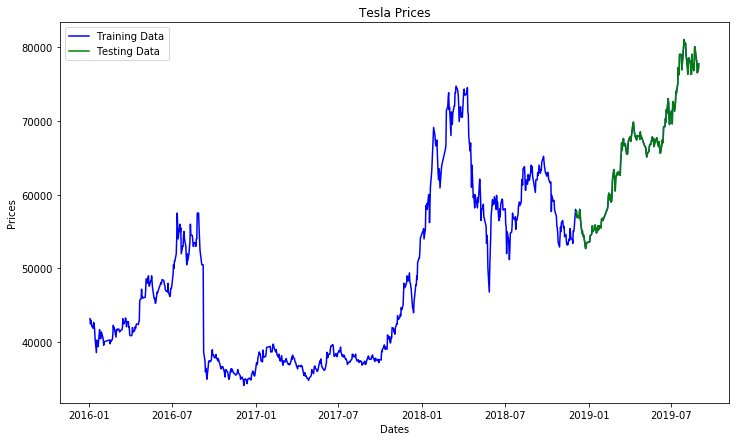

In [18]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
# plt.xticks(np.arange(0,913, 300), df['Date'][0:913:300])
plt.legend()

In [0]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))
def mape(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 100/ np.abs(y_pred)))    

In [22]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)
error3 = mape(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error3)

<class 'list'>
Testing Mean Squared Error: 922346.574
Symmetric mean absolute percentage error: 13.482


In [25]:
predictions

[array([58083.56569086]),
 array([57858.02095787]),
 array([57796.88265635]),
 array([57062.74592825]),
 array([57101.80097829]),
 array([56961.75134713]),
 array([56750.76087826]),
 array([58000.16745524]),
 array([57724.06858738]),
 array([56497.26634568]),
 array([54794.87255807]),
 array([54935.77359184]),
 array([54412.50308187]),
 array([54475.22184886]),
 array([54554.18777585]),
 array([53098.5203202]),
 array([52597.96166605]),
 array([52770.9199726]),
 array([53450.49021431]),
 array([53560.56707479]),
 array([53612.93357333]),
 array([53651.04402296]),
 array([54397.93796567]),
 array([54687.91857718]),
 array([55022.64583283]),
 array([55871.55324256]),
 array([55109.14272745]),
 array([55151.11257723]),
 array([55366.35179893]),
 array([55878.00649252]),
 array([55487.59684507]),
 array([55173.9952121]),
 array([54829.84789896]),
 array([55737.93722953]),
 array([55310.52319389]),
 array([55333.77280416]),
 array([55478.83146286]),
 array([55778.75898374]),
 array([55566.2

In [0]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]

In [0]:
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=True)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)

In [26]:
output


(array([58083.56569086]),
 array([1132.13558734]),
 array([[55864.62071406, 60302.51066766]]))

In [28]:
test_ar[0]

57600

In [37]:
test_data.index

DatetimeIndex(['2018-12-04', '2018-12-05', '2018-12-06', '2018-12-07',
               '2018-12-10', '2018-12-11', '2018-12-12', '2018-12-13',
               '2018-12-14', '2018-12-17',
               ...
               '2019-08-19', '2019-08-20', '2019-08-21', '2019-08-22',
               '2019-08-23', '2019-08-26', '2019-08-27', '2019-08-28',
               '2019-08-29', '2019-08-30'],
              dtype='datetime64[ns]', name='Date', length=183, freq=None)

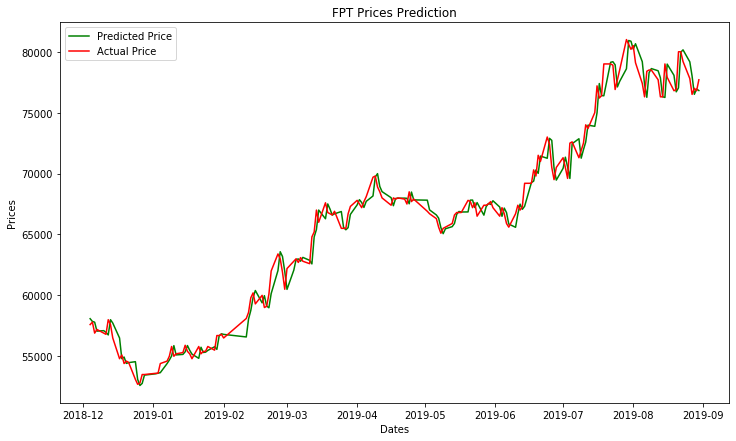

In [29]:
plt.figure(figsize=(12,7))
# plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('FPT Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
# plt.xticks(np.arange(0,913, 300), df['Date'][0:913:300])
plt.legend()

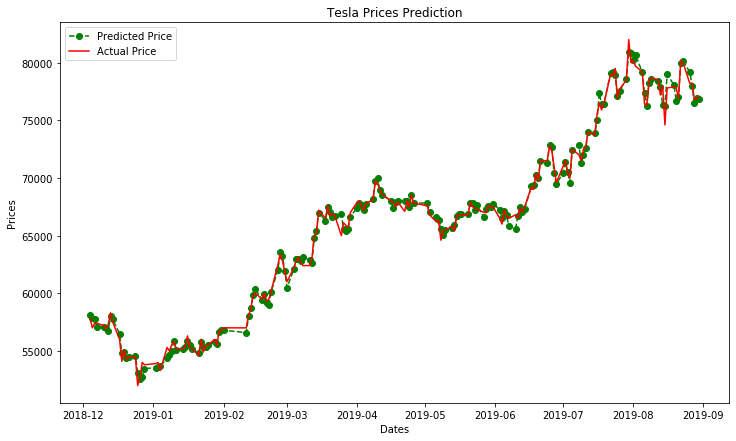

In [0]:

#test_data['Date'][0:1856:10]

plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
# plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [0]:
new_pred  = []
for i in predictions:
  new_pred.append(i[0])

In [0]:
new_pred= np.asarray(a)

In [0]:
new_pred

array([56632.90590764, 57576.49363085, 57429.31212328, 57544.34588665,
       57446.00683782, 57312.94873954, 56958.03009508, 57242.80751457,
       58088.73734135, 57674.45288127, 56423.14120602, 54436.03348959,
       54793.55571451, 54110.02021531, 54454.40245713, 54379.96162182,
       52489.23156994, 52510.77316958, 53465.12137209, 53783.96698834,
       53976.68936819, 54060.86548364, 53501.91138121, 54976.84853582,
       54961.09091314, 55642.1191828 , 55773.76277737, 55458.7761788 ,
       55267.5290991 , 55262.29623506, 56124.54245354, 55460.40852887,
       55371.79926101, 54653.02874232, 55766.32365305, 54967.4933249 ,
       55474.05010407, 55395.4586516 , 55997.39043002, 55581.22458165,
       56592.90505875, 56749.69526365, 57119.07128932, 57058.66991174,
       58001.7637603 , 58526.53126152, 59736.30842432, 60080.00841133,
       59821.59432553, 60040.95772567, 59443.81687601, 59537.60707877,
       60010.10327234, 62116.3095556 , 63296.4026555 , 63225.7318957 ,
      

In [0]:
test_ar

array([57600, 57800, 56900, 57200, 56900, 56800, 58000, 57600, 56500,
       54800, 55100, 54400, 54600, 54500, 53100, 52700, 52800, 53500,
       53500, 53600, 53600, 54400, 54600, 55000, 55800, 55000, 55200,
       55300, 55900, 55400, 55200, 54800, 55800, 55200, 55400, 55400,
       55800, 55500, 56700, 56700, 56800, 56500, 58100, 58600, 59800,
       60200, 59300, 60000, 59000, 59100, 60100, 62000, 63400, 63000,
       61900, 60500, 62200, 62800, 63000, 62700, 63100, 62800, 62600,
       64800, 65200, 67000, 66000, 67600, 66800, 66700, 66600, 66900,
       65500, 65500, 65500, 66700, 67300, 67800, 67500, 67200, 67700,
       68100, 69700, 69800, 68900, 68500, 68000, 67400, 68000, 67900,
       68000, 67900, 67500, 68500, 67700, 67900, 66900, 66700, 66300,
       65600, 65100, 65500, 65600, 65900, 66600, 66800, 66800, 66800,
       67800, 67700, 67200, 67600, 66500, 67400, 67400, 67500, 67700,
       67200, 66500, 67200, 66700, 65900, 65600, 66700, 67400, 67000,
       67300, 69200,

In [0]:
sum((new_pred-test_ar)**2)/a.shape[0]

1125827.579950131

In [0]:
max(abs(new_pred-test_ar))

3856.613200982014

In [0]:
min(abs(new_pred-test_ar))

11.331730685313232

In [0]:
#mape
np.mean(np.abs((new_pred - test_ar) / test_ar)) * 100

1.162045945069243

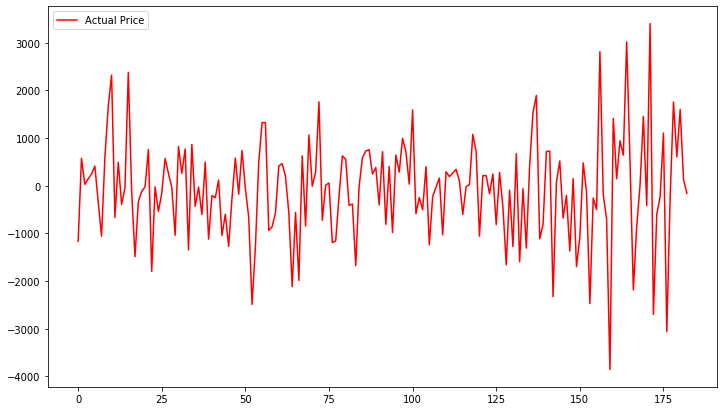

In [0]:
plt.figure(figsize=(12,7))
plt.plot(new_pred-test_ar, color='red', label='Actual Price')
plt.legend()

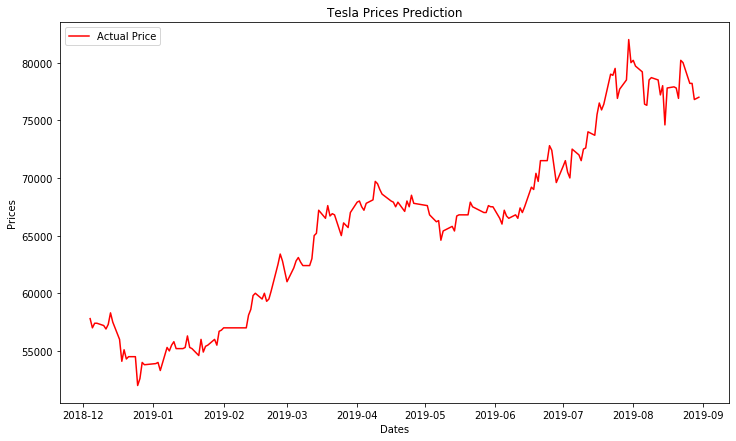

In [0]:

#test_data['Date'][0:1856:10]

plt.figure(figsize=(12,7))
# plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
#          label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
# plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [0]:
test_ar

array([43000, 51000, 45400, 45000, 41300, 46500, 42300, 48600, 42100,
       47800, 49750, 46000, 43200, 49500, 40000, 44400, 57300, 41400,
       46500, 62000, 47800, 61000, 45600, 58600, 45000, 47900, 45900,
       56900, 48900, 47800, 42600, 47850, 44500, 46500, 41100, 46700,
       42700, 48500, 42400, 53500, 47600, 48850, 46000, 43200, 49800,
       41500, 43050, 42650, 58000, 41500, 46500, 46000, 60700, 45200,
       47600, 59900, 44800, 48000, 46100, 55000, 40800, 45300, 40900,
       46500, 44900, 46050, 41300, 48000, 42900, 44300, 54000, 47750,
       49000, 46050, 43300, 49400, 58000, 42900, 42700, 57500, 42100,
       46300, 42500, 46600, 59200, 45100, 48300, 47600, 59100, 44750,
       48000, 46400, 47200, 45000, 41200, 45900, 44300, 45400, 41300,
       48200, 47300, 44300, 53000, 47650, 49000, 46500, 43200, 43950,
       58000, 42750, 43250, 56700, 42050, 46300, 61000, 42400, 47900,
       48000, 47400, 59400, 45600, 48400, 42100, 45500, 44850, 41100,
       46300, 42500,

In [0]:
predictions

[array([46837.53395225]),
 array([47041.57274741]),
 array([47016.17710135]),
 array([46969.5380466]),
 array([46428.65778256]),
 array([47349.36988728]),
 array([45401.10196823]),
 array([44426.37575562]),
 array([43468.6688987]),
 array([44842.97621748]),
 array([44522.35694638]),
 array([45650.26431995]),
 array([45719.91495925]),
 array([47291.70941445]),
 array([47197.93419853]),
 array([46378.95098392]),
 array([45068.53209941]),
 array([44953.76101341]),
 array([45206.08327389]),
 array([47084.06241722]),
 array([48647.96324236]),
 array([48103.36003917]),
 array([50576.11036252]),
 array([55089.15445093]),
 array([53135.96864405]),
 array([54672.68235027]),
 array([51499.45570917]),
 array([51461.57657526]),
 array([47746.4269577]),
 array([48634.63101534]),
 array([49686.93328793]),
 array([51574.64443887]),
 array([48686.42280632]),
 array([46850.57655129]),
 array([45248.62446079]),
 array([46016.45489388]),
 array([44891.40997374]),
 array([44804.48525062]),
 array([43670.1